In [1]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

# import libraries
import pandas as pd

from pathlib import Path
import xml.etree.ElementTree
from batterydispatch.environment.System import System
from batterydispatch.environment.Battery import Battery
from batterydispatch.agent.agents import ThresholdAgent, MonteCarloAgent, QAgent
from batterydispatch.agent.policies import do_nothing

# Point a Path object at the GreenButton data
fdir = Path().absolute()
fname = "pge_electric_interval_data_2011-03-06_to_2012-04-06 A10S Med Business Large Usage.xml"
fpath = fdir / "batterydispatch" / "resources" / fname
#fname = "pge_electric_interval_data_2011-03-06_to_2012-04-06 A10S Med Business Heavy Usage.xml"


In [2]:
# Set any policy parameters and choose a policy
TARGET_DEMAND = 8000
agent = ThresholdAgent(TARGET_DEMAND)
battery_power = 1000

# Set up the system
system = System(fpath)
system.bus.add_battery(Battery(capacity=5000, power=battery_power))
system.dispatch_cost = 0.1
system.set_actions(2, 1)
system.actions.options *= battery_power
system.fit_states()
system.set_agent(agent)
system.initialize_A()

In [3]:
system.actions.options

array([-1000.,  -500.,     0.,   500.,  1000.])

In [4]:
# Run first day
system.agent.set_policy(do_nothing)
_, (demand, energy) = system.tariff.calculate_bill(system.run_first_day())
default_reward = demand + energy * 30
default_reward

401747.2799999999

In [5]:

agent2 = MonteCarloAgent()
agent2.subtype = 'off-policy'
#agent2 = QAgent()
system.set_agent(agent2)
system.agent.patience = 50
system.agent.initialize_state_actions(system.state.list_all_states(), system.actions.options, -1*default_reward-10)
system.agent.default_SA_estimate = default_reward * -1

system.agent.set_greedy_policy(0.1)
system.agent.learning_rate = 0.05

In [6]:
system.agent.set_greedy_policy(0.025)



C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -250.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))
C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -125.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))


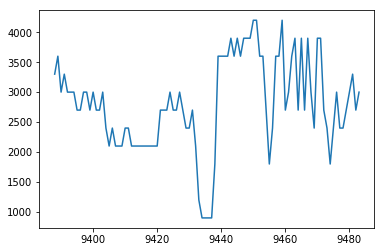

In [7]:
grid_flow = system.run_first_day()

from matplotlib import pyplot as plt

plt.plot(grid_flow.load)
plt.show()

In [8]:
pd.set_option("display.max_rows", 100000)
grid_flow

,duration,start,value,duration_hrs,start_date,battery_action,load,state_of_charge,net_flow,state
9388,900,2011-06-12 00:00:00,3300.0,0.25,2011-06-12,0.0,3300.0,0.0,3300.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9389,900,2011-06-12 00:15:00,3600.0,0.25,2011-06-12,0.0,3600.0,0.0,3600.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9390,900,2011-06-12 00:30:00,3000.0,0.25,2011-06-12,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9391,900,2011-06-12 00:45:00,3300.0,0.25,2011-06-12,0.0,3300.0,0.0,3300.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9392,900,2011-06-12 01:00:00,3000.0,0.25,2011-06-12,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9393,900,2011-06-12 01:15:00,3000.0,0.25,2011-06-12,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9394,900,2011-06-12 01:30:00,3000.0,0.25,2011-06-12,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
9395,900,2011-06-12 01:45:00,2700.0,0.25,2011-06-12,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
9396,900,2011-06-12 02:00:00,2700.0,0.25,2011-06-12,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
9397,900,2011-06-12 02:15:00,3000.0,0.25,2011-06-12,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"


In [9]:
hist = []


In [10]:

from IPython.display import clear_output

i = 0
cycle = 'day'
if cycle == 'day':
    energy_multipler = 30
elif cycle == 'month':
    energy_multipler = 1
    
while True:
    i += 1
    if i > 20:
        i = 0
        clear_output()
    if cycle == 'day':
        grid_flow = system.run_first_day()
    elif cycle == 'month':
        grid_flow = system.run_first_month()
    else:
        raise NotImplementedError
        
    peak_shave = max(grid_flow.load) - max(grid_flow.net_flow)
    demand = system.tariff.calculate_demand_charge(grid_flow, 'net_flow')
    energy = system.tariff.calculate_energy_charge(grid_flow, 'net_flow')
    orig_demand = system.tariff.calculate_demand_charge(grid_flow, 'load')
    orig_energy = system.tariff.calculate_energy_charge(grid_flow, 'load')

    reward = demand + energy * energy_multipler
    savings = orig_demand + orig_energy * energy_multipler - reward
    print("Original demand: {}, new demand:{}, total reward: {}, savings: {}".format(max(grid_flow.load), max(grid_flow.net_flow), reward, savings))
    print("    final state: {}, patience at {}".format(system.state.as_tuple(), system.agent.patience_counter))
    hist.append((peak_shave, reward, savings))
    if max(grid_flow.load) > max(grid_flow.net_flow):
        print("BOOM")
        #break
    if system.convergence_flag == True:
        break

Original demand: 4200.0, new demand:4300.0, total reward: 401016.42999999993, savings: 730.8499999999767
    final state: (20.0, 0.0, 3647.368421052631, 4689.473684210527), patience at 50
Original demand: 4200.0, new demand:4200.0, total reward: 383550.6299999999, savings: 18196.650000000023
    final state: (20.0, 0.0, 3647.368421052631, 4689.473684210527), patience at 51


In [ ]:

from IPython.display import clear_output

i = 0
cycle = 'day'
if cycle == 'day':
    energy_multipler = 30
elif cycle == 'month':
    energy_multipler = 1
while True:
    
    if cycle == 'day':
        daily_generator = system.load.get_daily_generator()
    elif cycle == 'month':
        daily_generator = system.load.get_month_generator()
    for df in daily_generator:
        grid_flow = system.run_episode(df, False, demand_over=cycle)
        #grid_flow = system.run_all_days()
        peak_shave = max(grid_flow.load) - max(grid_flow.net_flow)
        demand = system.tariff.calculate_demand_charge(grid_flow, 'net_flow')
        energy = system.tariff.calculate_energy_charge(grid_flow, 'net_flow')
        orig_demand = system.tariff.calculate_demand_charge(grid_flow, 'load')
        orig_energy = system.tariff.calculate_energy_charge(grid_flow, 'load')

        reward = demand + energy * energy_multipler
        savings = orig_demand + orig_energy * energy_multipler - reward
        print("Original demand: {}, new demand:{}, total reward: {}, savings: {}".format(max(grid_flow.load), max(grid_flow.net_flow), reward, savings))
        print("    final state: {}".format(system.state.as_tuple()))
        hist.append((peak_shave, reward, savings))
        if max(grid_flow.load) > max(grid_flow.net_flow):
            print("BOOM")
            #break
        
        i += 1
        if i > 20:
            i = 0
            clear_output()

In [ ]:
from matplotlib import pyplot as plt

hist2 = [h[0] for h in hist]
plt.plot(hist2)
plt.show()

In [ ]:
system.agent.S_A_values

In [ ]:
# run and log a run across the entire dataset.
first = True
i=0
monthly_generator = system.load.get_month_generator()
for df in monthly_generator:
    grid_flow = system.run_episode(df, False, demand_over='month')
    #grid_flow = system.run_all_days()
    peak_shave = max(grid_flow.load) - max(grid_flow.net_flow)
    demand = system.tariff.calculate_demand_charge(grid_flow, 'net_flow')
    energy = system.tariff.calculate_energy_charge(grid_flow, 'net_flow')
    orig_demand = system.tariff.calculate_demand_charge(grid_flow, 'load')
    orig_energy = system.tariff.calculate_energy_charge(grid_flow, 'load')

    reward = demand + energy * energy_multipler
    savings = orig_demand + orig_energy * energy_multipler - reward
    print("Original demand: {}, new demand:{}, total reward: {}, savings: {}".format(max(grid_flow.load), max(grid_flow.net_flow), reward, savings))
    print("    final state: {}".format(system.state.as_tuple()))
    hist.append((peak_shave, reward, savings))
    grid_flow['total_bill'] = system.tariff.calculate_demand_charge(grid_flow, 'net_flow')+\
                                                system.tariff.calculate_energy_charge(grid_flow, 'net_flow')
    grid_flow['new_demand'] = max(grid_flow.net_flow)
    grid_flow['original_demand'] = max(grid_flow.load)
    if first:
        all_grid_flow = grid_flow
    else:
        all_grid_flow = all_grid_flow.append(grid_flow)
    first = False
    i+=1

In [ ]:
all_grid_flow.shape

In [ ]:
grid_flow.shape

In [ ]:
all_grid_flow.to_clipboard()

In [ ]:
from matplotlib import pyplot as plt
hist2 = [h[2] for h in hist]
plt.plot(hist2)
plt.show()

In [ ]:
pd.set_option("display.max_rows", 100000)
grid_flow

In [ ]:
grid_flow.loc[4294].state

In [ ]:
system.agent.S_A_values[(20.0, 0.0, 6157.894736842105, 5328.9473684210525)]

In [ ]:
system.agent.S_A_values

In [ ]:
system.tariff.calculate_energy_charge(grid_flow, 'load')

In [ ]:
system.state.S_demand

In [ ]:
grid_flow

In [11]:
# Dump the optimal policy grid flow
system.agent.patience_counter = 0
system.agent.set_greedy_policy(eta=0)
grid_flow = system.run_first_day()


C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -250.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))
C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -125.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))


In [12]:
grid_flow.to_clipboard()

In [ ]:
from batterydispatch.agent.policies import _get_max_dict_val
d = {"A": 4, "B": 4, "C": 4}
_get_max_dict_val(d)

In [ ]:
5>None